<a href="https://colab.research.google.com/github/Carlosrbrj/marathondataset/blob/main/MVP_Marathon_Carlosjr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Análise de Dados e Boas Práticas

**Aluno:** Carlos Roberto Batista Rocha Júnior

Dezembro de 2023

# 1. Definição do Problema

O dataset utilizado nesse projeto é o MarathonData proveniente originalmente do Strava, construído por Andrea Girardi e postado publicamente no Kaggle. O seu objetivo é criar um modelo que irá prever o resultado de uma maratona, em tempo, com base no histórico de treinos do atleta 4 semanas antes da prova a partir de uma abordagem de aprendizado de máquina supervisionado. Esse dataset reúne informações de 87 atletas que completaram a maratona de Praga em 2017 com diversos atributos que descrevem desde a performance na prova, extraído a partir dos dados oficiais da direção da maratona, aos dados de treinos extraídos dos Strava, aplicativo que mensura performance de atletas e torna esses dados públicos. Para mais detalhes sobre o dataset, basta acessar: https://www.kaggle.com/datasets/girardi69/marathon-time-predictions


**Informações sobre os atributos**


1.   ID: contagem simples de atletas;
2.    Marathon: refere-se a prova que o atleta participou. Nesse caso, Praga 2017;
3. Name: nome do atleta;
4. Category: são categorias formadas pelo gênero e idade do atleta, sendo assim, temos:

  *   MAM - Homens abaixo de 40 anos,
  *   WAM - Mulheres abaixo de 40 anos
  *   M40 - Homens entre 40 - 45 anos


5. Km4week: refere-se ao número total de kms que o atleta treinou por semana antes da maratona, somada à distância percorrida na prova. Sendo assim, se km4week for igual a 100, então o atleta correu 400 km no total antes da prova;
6. Sp4week: refere-se a velocidade média dos atletas nos treinos nas últimas 4 semanas;
7. Crosstraning: Refere-se aos treinos extras corrida que o atleta fez durante a preparação;
8. Wall21: É o tempo que cada atleta levou para completar a primeira metade da maratona (em decimais);
9. Marathon time: É o tempo final da prova em decimais;
10. Squad: é uma categorização de pelotão com base no resultado final, sendo assim, temos:

  * A Terminou a prova abaixo de 3h
  * B Terminou a prova entre 3h e 3h20m
  * C Terminou a prova entre 3h20m e 3h40m
  * D Terminou a prova entre 3h40 e 4h


# 2. Análise de Dados

Para dar início a análise exploratória de dados, o bloco de código abaixo importa todos os pacotes que irei usar nesse projeto, além de desativar as notificações de "warnings".

In [22]:
# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import missingno as ms # para tratamento de missings
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2.1 - Carga de dados

Para carregar o dataset disponível online em um repositório do Github, usaremos o pacote Pandas (phyton Data Analysis Libary) para carregar um aquivo .csv.

In [23]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/Carlosrbrj/marathondataset/main/MarathonData.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

## 2.2 - Análises descritivas



Uma vez carregado o dataset, vamos entender quais são suas características de construção, como sua dimensão, informações e alguns exemplos de linhas.

In [24]:
# Mostra as dimensões do dataset
dataset.shape

(87, 10)

In [25]:
# Mostra as informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         81 non-null     float64
 8   MarathonTime   87 non-null     float64
 9   Squad          87 non-null     object 
dtypes: float64(4), int64(1), object(5)
memory usage: 6.9+ KB


Com base nas informações acima, podemos perceber que o dataset é formado por 87 linhas e 10 colunas, sendo 4 atributos do tipo float, 1 int e 5 object (textos e números).

Ainda sobre os dados, 13 atletas fazem algum tipo de treinamento complementar à corrida e existem 6 atletas que não estão em nenhuma categoria de idade e gênero determinada.

De outro modo, podemos perceber que existem 6 valores nulos no atributo Wall21 que não deveriam acontecer, mas que será tratado mais a frente.

Por fim, para entender como esses dados se comportam, os códigos abaixo exibem as primeiras e as últimas linhas desse dataset.

In [26]:
# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,Squad
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A
5,6,Prague17,David Pecina,M40,42.2,13.612903,NaN,1.32,2.78,A
6,7,Prague17,Tomas Drabek,M40,89.0,12.594340,NaN,1.38,2.81,A
7,8,Prague17,Jan Rada,M45,106.0,12.694611,NaN,1.41,2.84,A
8,9,Prague17,Tomas Drabek,MAM,70.0,13.770492,ciclista 1h,1.38,2.83,A
9,10,Prague17,martin ?indel ?,M45,84.2,13.365079,NaN,1.35,2.86,A


In [27]:
# Mostra as 10 primeiras linhas do dataset
dataset.tail(10)

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,Squad
77,78,Prague17,Luk ? Pe?iva,MAM,30.6,11.060241,NaN,1.97,3.87,D
78,79,Prague17,Chris Smith,MAM,28.0,11.200000,NaN,1.97,3.89,D
79,80,Prague17,Martin Werner,MAM,53.9,11.802920,NaN,1.98,3.90,D
80,81,Prague17,C‚dou Gatto,NaN,38.1,11.043478,NaN,NaN,3.90,D
81,82,Prague17,Nathan Khan,MAM,35.6,11.125000,NaN,2.05,3.92,D
82,83,Prague17,Stefano Vegliani,M55,50.0,10.830325,NaN,2.02,3.93,D
83,84,Prague17,Andrej Madliak,M40,33.6,10.130653,ciclista 3h,1.94,3.93,D
84,85,Prague17,Yoi Ohsako,M40,55.4,11.043189,NaN,1.94,3.94,D
85,86,Prague17,Simon Dunn,M45,33.2,11.066667,NaN,2.05,3.95,D
86,87,Prague17,Pavel ?imek,M40,17.9,10.848485,ciclista 5h,2.05,3.98,D


Olhando para as amostras de dados acima, podemos observar que, aparentemente, não existe problemas com a importação da base de dados. Também, pode-se concluir que a variável ID, Marathon e Name podem não contribuir muito para a construção do modelo de machine learning. Entretando, iremos continuar as análises descritivas considerando todas os atributos nesse primeiro momento.

Agora, com o objetivo de entender como os dados estão distribuídos, vamos verificar se o dataset tem as categorias de pelotão (Squad) balanceadas, uma vez que esse atributo cumpre uma função de classificação com base na performance. Veremos que as categorias de pelotão estão balanceadas e que a maioria está no segundo pelotão (B), formado por aqueles que terminaram a prova entre 3h e 3h20.



In [28]:
# Verifica a distribuição das categorias de pelotão
dataset.groupby('Squad').size()

Squad
A    21
B    28
C    21
D    17
dtype: int64

Do mesmo modo, vamos verificar a distribuição de CrossTraning, com o objetivo de identificar quantos atletas fazem algum outro tipo de treino durante o cíclo de treinamento e quais são. Aqui, veremos que apenas 13 atletas fazem outros tipos de treinos, sendo todos cliclistas.

In [29]:
# Verifica a distribuição de outros tipos de treinos
dataset.groupby('CrossTraining').size()

CrossTraining
ciclista 13h    1
ciclista 1h     1
ciclista 3h     5
ciclista 4h     2
ciclista 5h     4
dtype: int64

Por fim, os códigos abaixo exibem o histograma e a distribuição do atributo 'Category'. Com isso, podemos observar que a maioria dos atletas desse dataset é formada por homens abaixo de 40 anos (MAM). Com isso, esse é uma primeira evidência da necessidade de transformações de dados, como normalização e padronização no próximo passo desse projeto.

Category
M40    15
M45    15
M50     4
M55     3
MAM    40
WAM     4
dtype: int64

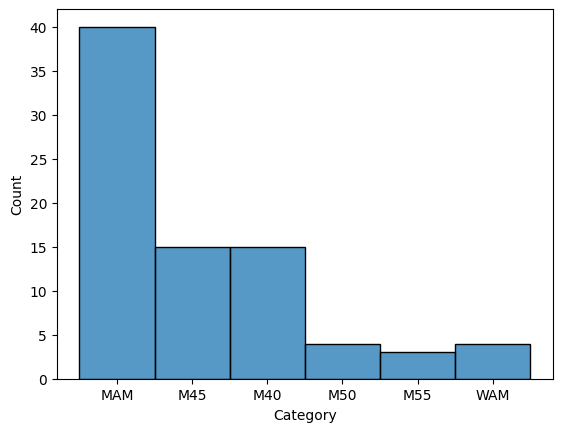

In [30]:
# histograma com seaborn
sns.histplot(dataset['Category'], bins=7);

# Verifica a distribuição do atributo Category
dataset.groupby('Category').size()

## 2.3 - Estatísticas descritiva
Vamos análisar as estatíticas descritivas do dataset para identificar os primeiros insights.


In [31]:
# Obtendo as estatísticas descritivas
dataset.describe()

,id,km4week,sp4week,Wall21,MarathonTime
count,87.000000,87.000000,87.000000,81.000000,87.000000
mean,44.000000,62.347126,12.095017,1.630617,3.319080
std,25.258662,26.956019,1.200325,0.210490,0.376923
min,1.000000,17.900000,8.031414,1.160000,2.370000
25%,22.500000,44.200000,11.390110,1.450000,3.045000
50%,44.000000,58.800000,12.128440,1.620000,3.320000
75%,65.500000,77.500000,12.779031,1.760000,3.605000
max,87.000000,137.500000,14.970492,2.050000,3.980000


Com base no resumo acima, podemos observar que as variáveis que estão no resumo são aquelas do tipo float. Observamos que a média de tempo para conclusão de uma maratona nesse dataset foi de 3,31 horas, sendo o tempo médio para concluir a primeira metade da prova, 1,63 horas. Além disso, sabemos que o melhor atleta terminou a prova em 2,37h. O código abaixo plota boxplots do atributo MarathonTime e confirma essa primeira conclusão.
Do mesmo modo, podemos concluir que, em média, os atletatas correram 62,34 km por semana durante os seus treinos 4 semanas antes da prova. Por fim, a velocidade média desses atletas nos treinos que antecederam a prova foi de 12,09 km/h.

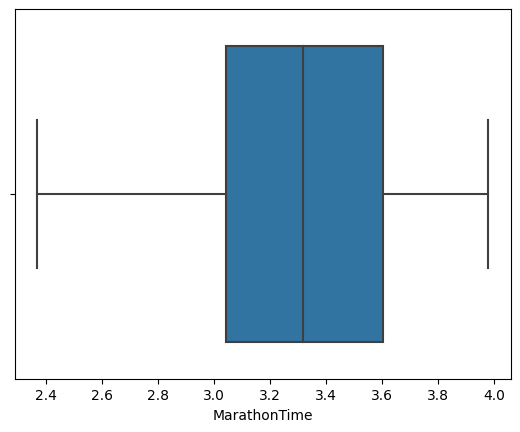

In [32]:
# boxplot com seaborn de MarathonTime
sns.boxplot(x=dataset['MarathonTime']);

## 2.4 - Visualizações Unimodais

Para iniciar as análises unimodais, iremos criar o gráfico de densidade (Density Plot) para cada atributo do dataset para identificar a distribuição dessas variáveis. Com isso, veremos que o atributo Km4week, MarathonTime e sp42eek têm uma distribuição próxima à normal.

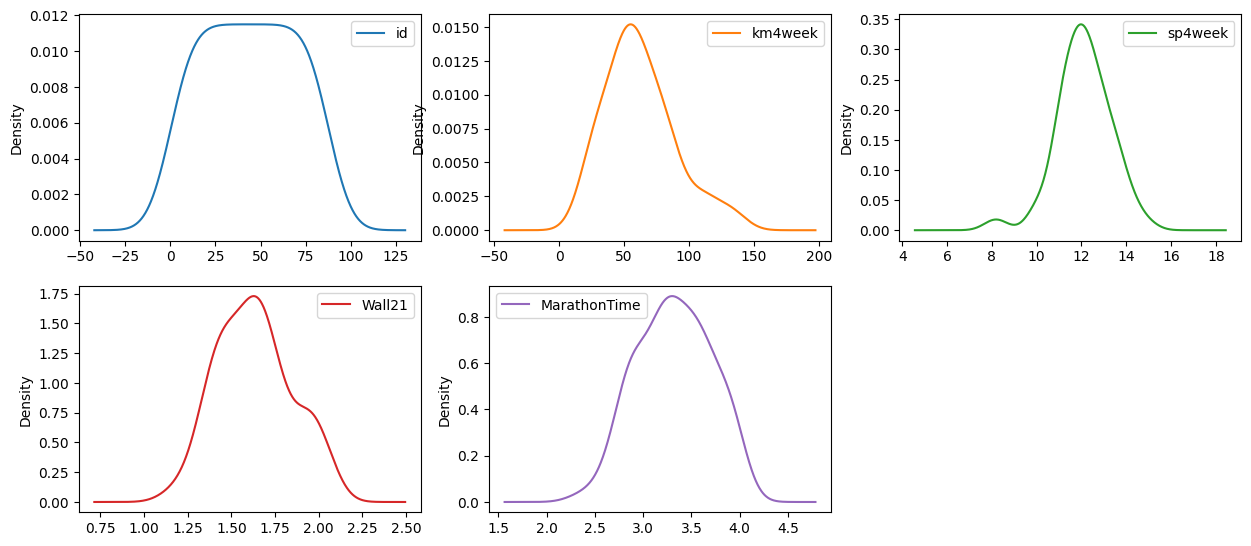

In [33]:
# Density Plot
dataset.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

Para ter uma melhor visualização do dataset, usaremos o Boxplot via biblioteca seaborn. Nesses gráficos, a linha no centro (verde) representa o valor da mediana (segundo quartil ou p50). A linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75). A partir dessa análise, podemos concluir que alguns atributos possuem outliers destacados, como o sp4week e o km4week.

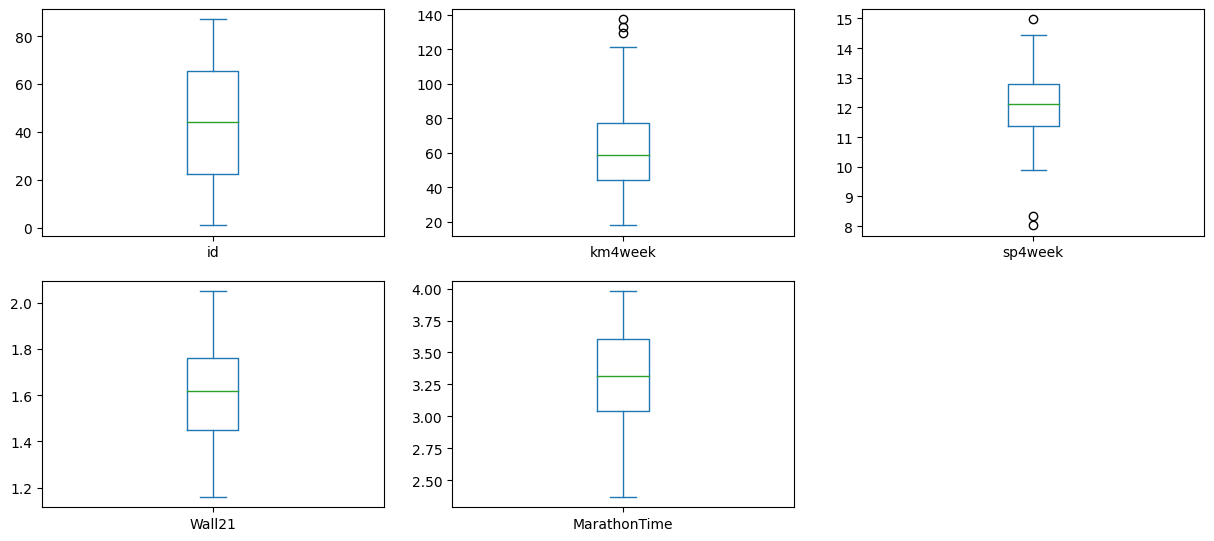

In [34]:
# Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

## 2.5 - Visualizações Multimodais

A análise das visualizações multimodais permite entender como os atributos interagem entre si. Para isso, iremos verificar a covariância entre as variáveis númericas do dataset a partir do coeficiente de correlação de Pearson atráves da matriz de correlação, que segue a seguinte lógica:


*   Próximo de -1 - Há uma correlação negativa entre as variáveis;
*   Próximo a +1 - Existe uma correlçaõ positiva entre as variáveis;
*   0: Não existe correlação entre as variávies.



A partir dos resultados, chama atenção a relação entre os atributos km4week e marathonTime, negativamente correlacionados, indicando que, quanto mais um atleta treina durante as 4 semanas que antes da prova, menor tende ser o tempo dele na prova. O mesmo acontece com o atributo wall21 por ser um recorte do atributo marathonTime. Além disso, também chama atenção a correlação alta e negativa entre sp4week e marathonTime.


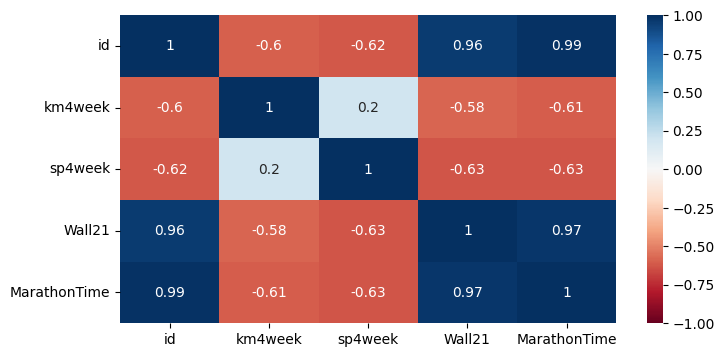

In [35]:
# Matriz de Correlação com Seaborn
plt.figure(figsize = (8,4))
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

Por fim, para um melhor entendimento das relações entre as variáveis, o código a seguir exibe o gráfico de dispersão (scallet plot) com a biblioteca seaborn. Para melhor identificar as relações, também dividimos o dataset por cores de acordo com classificação de squad.

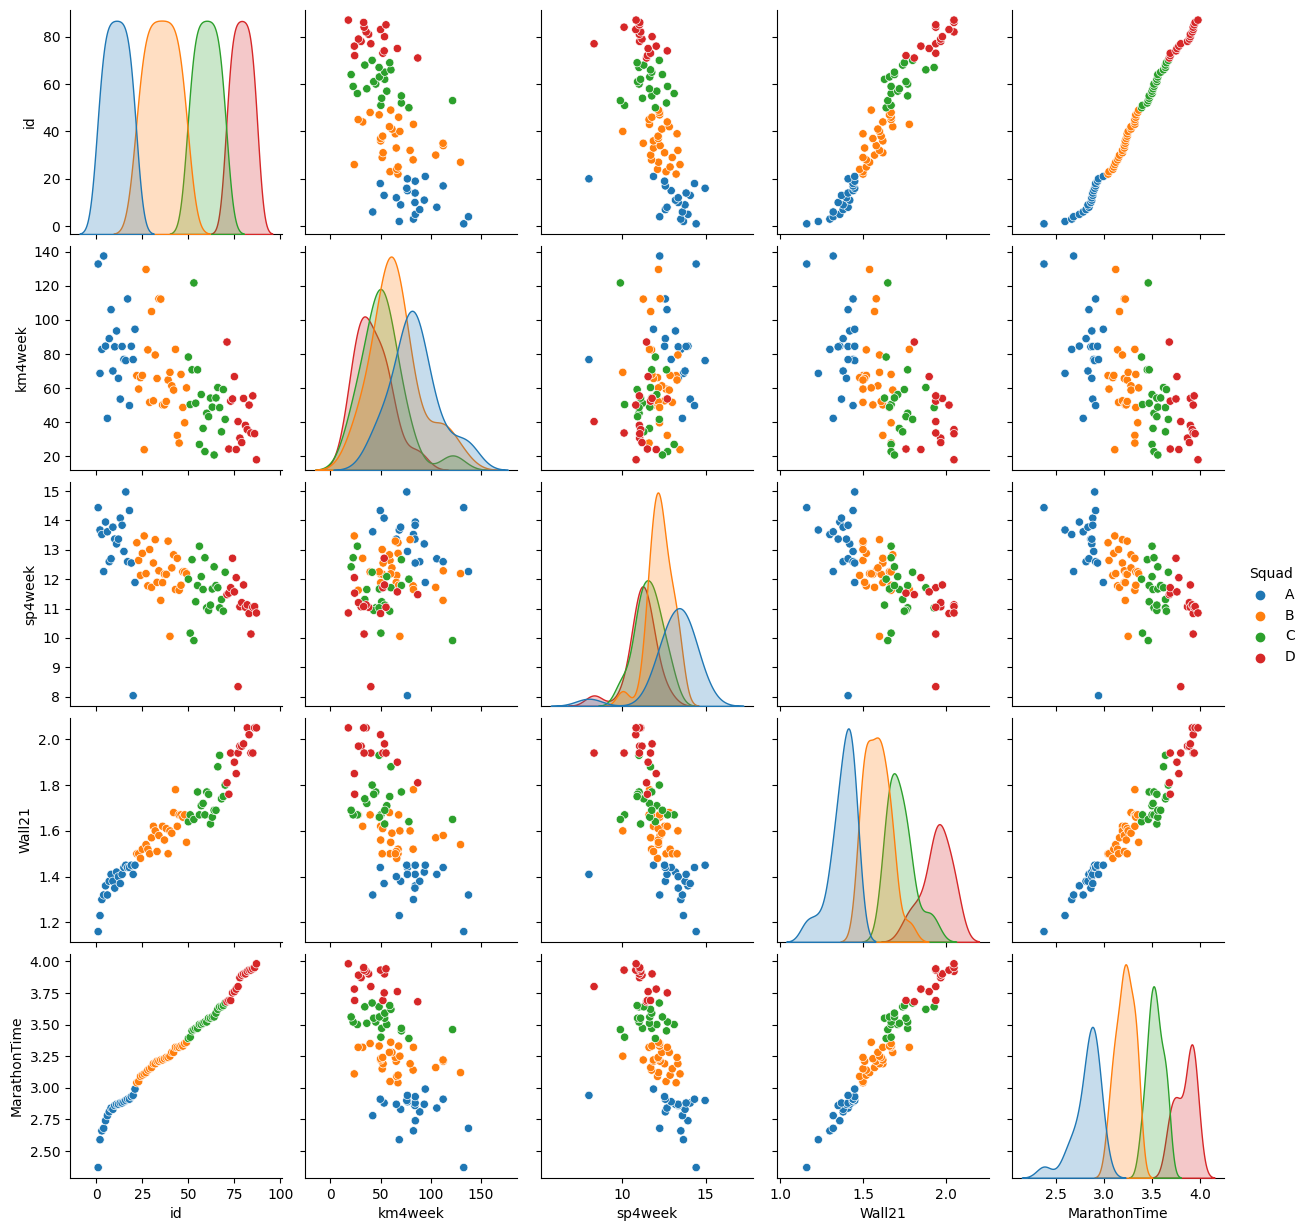

In [36]:
# Scatter Plot com Seaborn - Com divisão por squad

sns.pairplot(dataset, hue = "Squad", height = 2.5);

**Primeiras conclusões**

Comom podemos observar com as análises acima, algumas transformações podem ser feitas para melhorar a análises, como tratar os possíveis nulls no atributo Wall21, por exemplo.


No entanto, já podemos identificar a partir da análise da matriz de correlação e dos gráficos de dispersão que aqueles atletas que tiveram treinos de alta intensidade ou de grande volume (acumularam grandes distâncias por semana), também concluíram a prova em um tempo mais baixo. Isso vai de acordo com a classificação proposta, como podemos observar a dispersão do grupo A (de elite) quando relacionamos os atributos km4week e sp4week com marathonTime.


Sendo assim,  a próxima seção se dedica a etapa de pré-processamento de dados e, quando uma vez tratados, voltaremos a realizar as mesmas análises com o novo dataset para identificar melhores relações e visualizações de dados.




# 3. Pré-processamento de dados


Nessa etapa do projeto, iremos realizar operações de tratamento de dados, tais como tratamentos de missing value, limpeza do banco e outras transformações que serão relevantes para construção do modelo de Machine Learning.

Após os tratamentos, iremos repetir algumas análises já realizadas para fins de comparação.

## 3.1 - Tratamento de missings e limpeza de dados

Como já observamos nas análises anteriores, o dataset possuem alguns missings aparentes que precisam ser tratados. O código abaixo exibe a quantidade de valores faltantes em cada atributo do dataset. Com ele, podemos observar que existem 6 valores faltantes no atributo Category, que se refere a idade e gênero e 6 valores missings no atributo Wall21. Nesses dois casos, esse problema será tratado nessa seção.

In [37]:
# verificando nulls no dataset
dataset.isnull().sum()

id                0
Marathon          0
Name              0
Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            6
MarathonTime      0
Squad             0
dtype: int64

Antes de darmos início ao tratamento de dados, iremos criar um novo dataset para resguardar o orginal. Além disso, para uma melhor visualização da proporção de dados faltantes em cada atributo, o código abaixo também exibe uma visualização matricial dessa nulidade.

<Axes: >

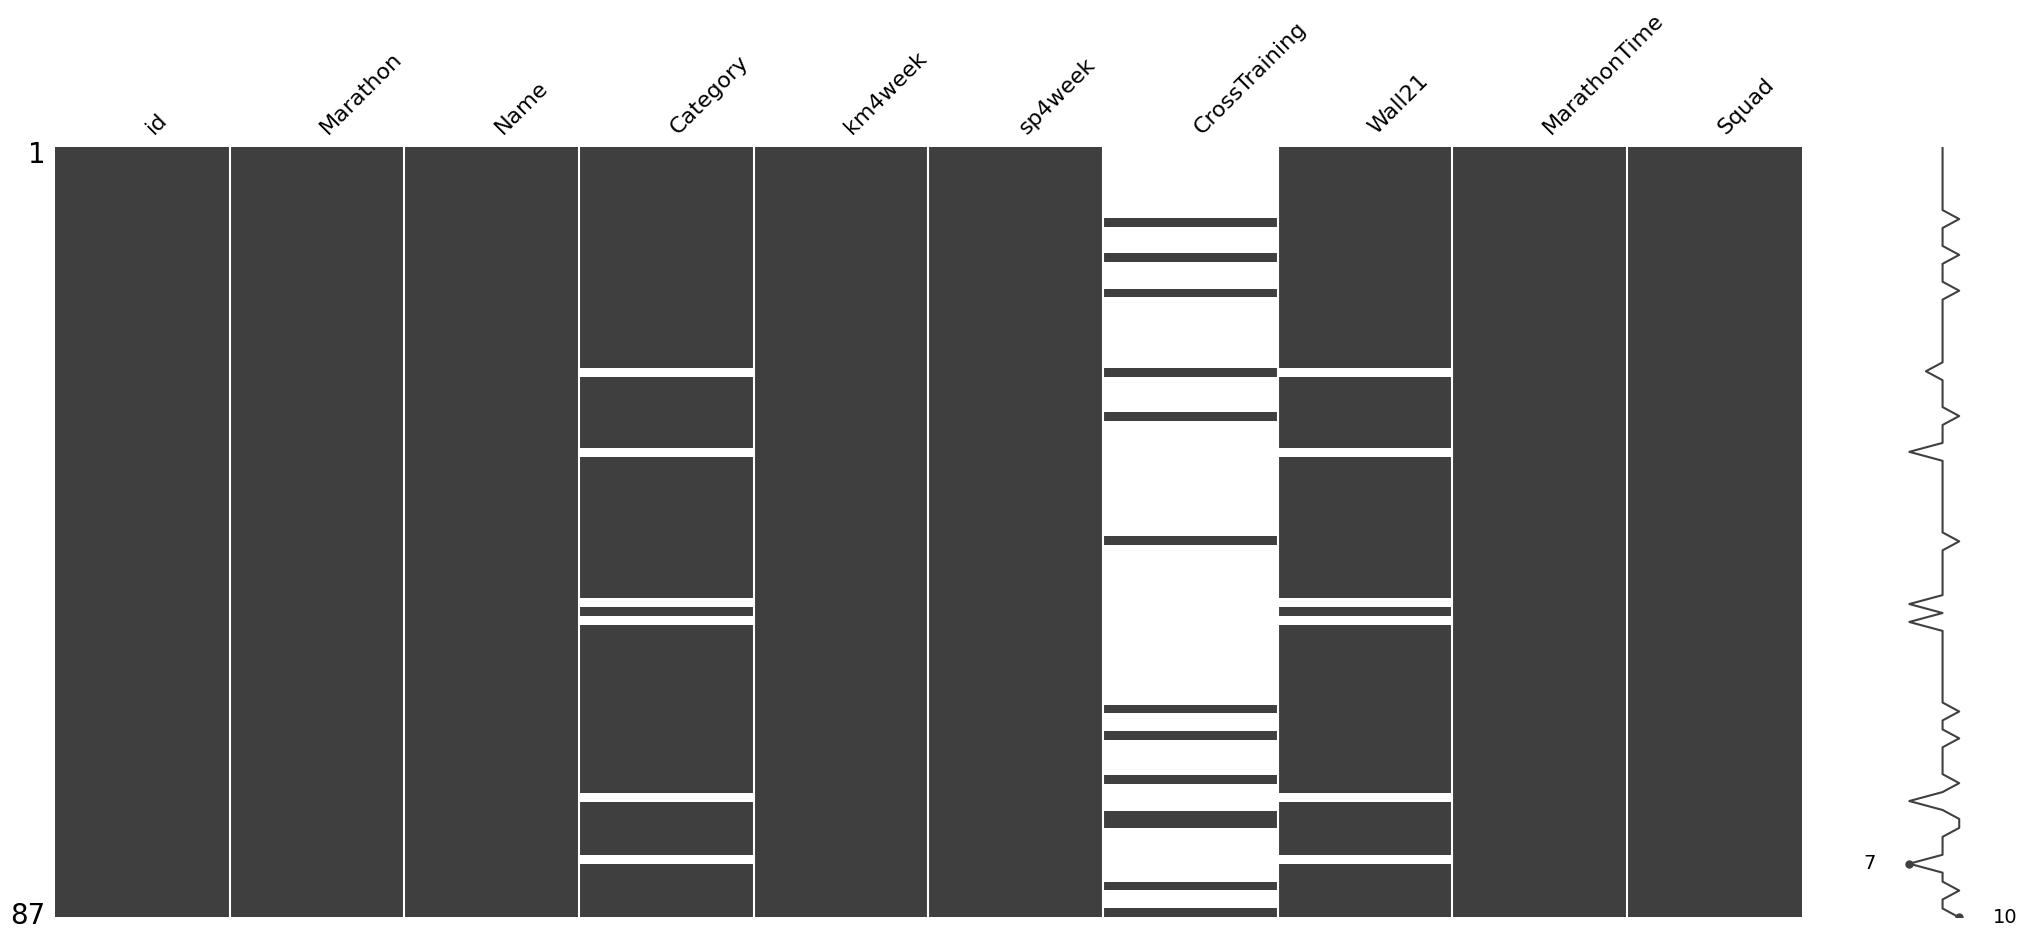

In [38]:
# Criando novo dataset para tratamento de missings com todas as colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas
MarathonSM = dataset[col[:]]

# exibindo visualização matricial da nulidade do dataset
ms.matrix(MarathonSM)

Com essa visualização, podemos identificar a necessidade de tratar alguns atributos importantes para o nosso dataset. Sendo assim, pra simplificar o modelo, o código abaixo exclui do novo dataset os atributos ID, Marathon e Name. De outro modo, vamos substituir os dados faltantes do atributo wall21 pela mediana desse atributo. Já em CrossTraning e Category, iremos substituir os dados nulos por zero. No entanto, antes de iniciarmos as transformações, o código abaixo exibe o nome de todos os atributos.

In [39]:
# Verifique as colunas presentes no DataFrame
print(MarathonSM.columns)

Index(['id', 'Marathon', 'Name', 'Category', 'km4week', 'sp4week',
       'CrossTraining', 'Wall21', 'MarathonTime', 'Squad'],
      dtype='object')


In [40]:
# removendo as colunas 'id' , 'Marathon' e 'Name'
MarathonSM.drop(['id', 'Marathon', 'Name'], axis=1, inplace= True)

# substituindo os NaN de 'Wall21' pela mediana da coluna
MarathonSM['Wall21'].fillna(MarathonSM['Wall21'].median(), inplace=True)

# substituindo os NaN de 'CrossTraning' e 'Category' por 0
MarathonSM['CrossTraining'].fillna(0, inplace=True)
MarathonSM['Category'].fillna(0, inplace=True)

Para visualizar as modificações propostas, o código abaixo também exibe uma visualização matricial do novo dataset.

<Axes: >

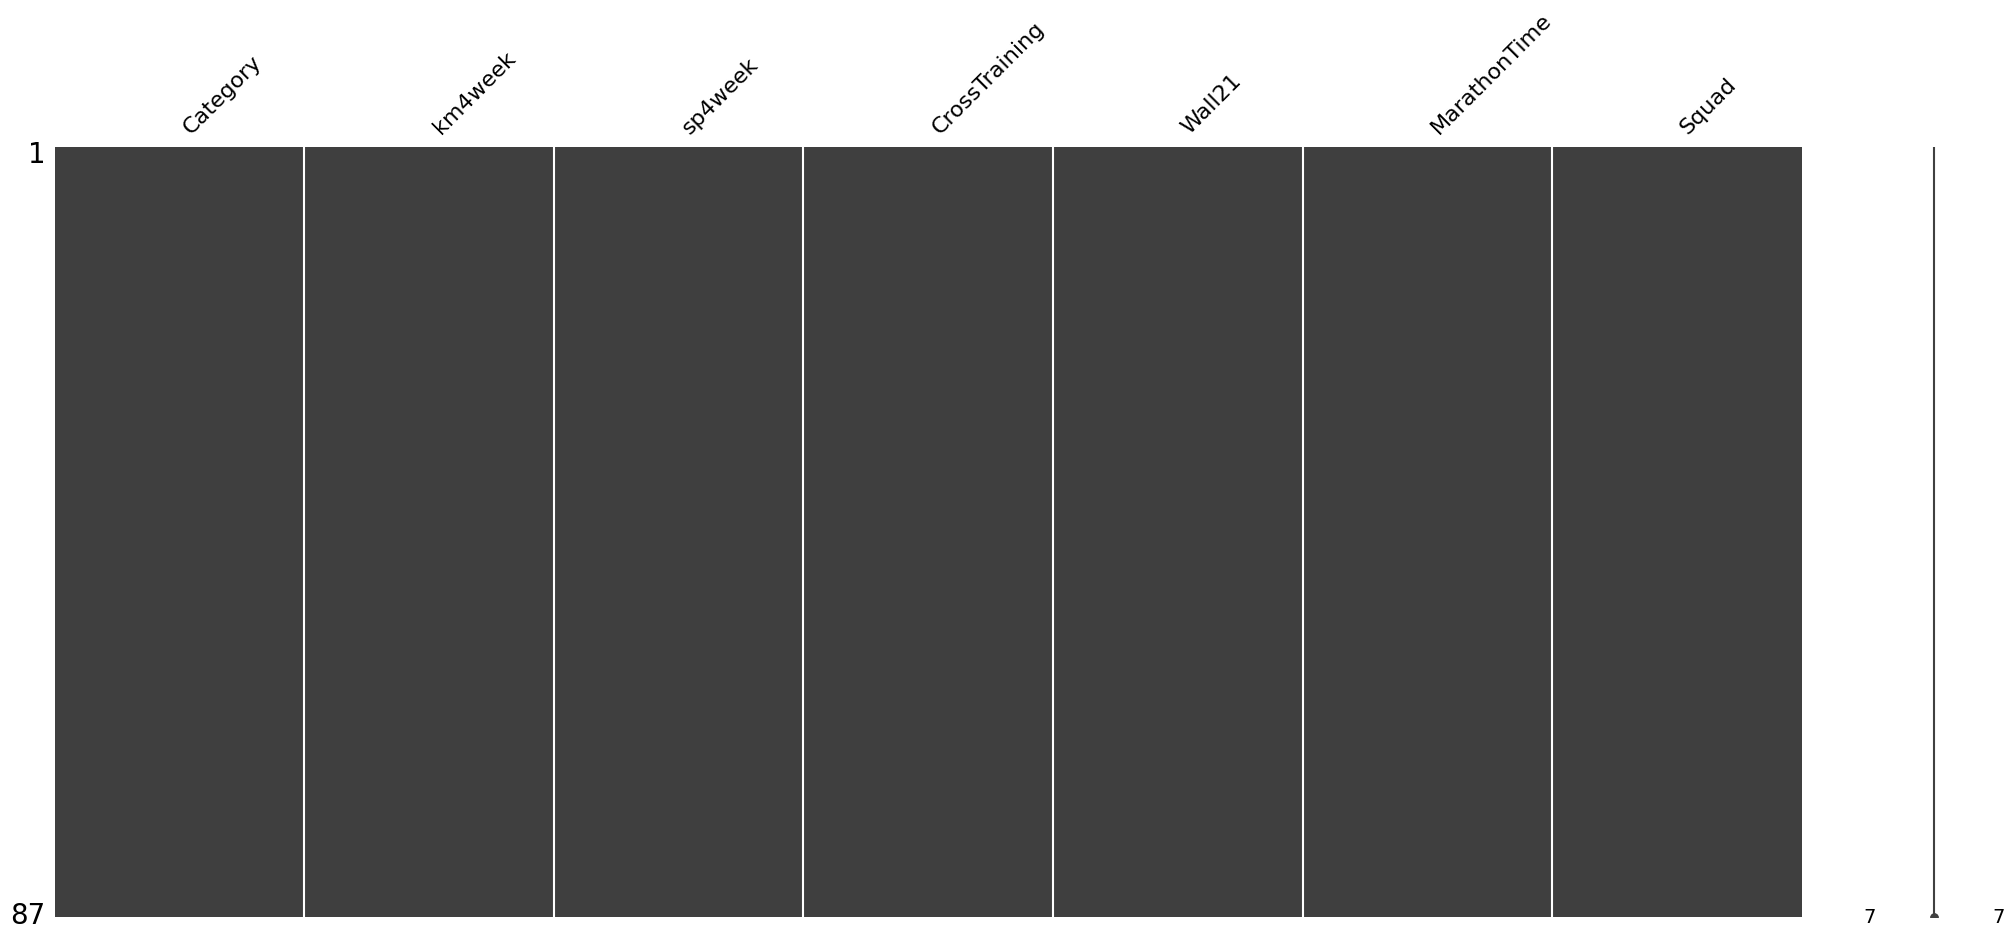

In [41]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(MarathonSM)

Como podemos observar, o novo dataset não apresenta mais nenhum dado nulo. Além disso, o código abaixo exibe as primeiras linhas do novo dataset.

In [42]:
# Guardando o novo dataset para testes futuros
MarathonSM = MarathonSM

# exibindo as primeiras linhas
MarathonSM.head()

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,Squad
0,MAM,132.8,14.434783,0,1.16,2.37,A
1,MAM,68.6,13.674419,0,1.23,2.59,A
2,MAM,82.7,13.520436,0,1.30,2.66,A
3,M45,137.5,12.258544,0,1.32,2.68,A
4,MAM,84.6,13.945055,0,1.36,2.74,A


## 3.2 - Análises descritivas com o novo dataset


Para fins de comparação, essa seção se dedica a repetir algumas análises apresentadas antes do dataset ser transformado. Com isso, o objetivo principal é identificar se as novas transformações resultam em melhores insights e visualizações.

Sendo assim, o código abaixo exibe um resumo dos estatístico do novo dataset. Nele, podemos observar que nenhuma propriedade estatística foi alterada, conforme o esperado.

In [43]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
MarathonSM.describe()

,km4week,sp4week,Wall21,MarathonTime
count,87.000000,87.000000,87.000000,87.000000
mean,62.347126,12.095017,1.629885,3.319080
std,26.956019,1.200325,0.203032,0.376923
min,17.900000,8.031414,1.160000,2.370000
25%,44.200000,11.390110,1.490000,3.045000
50%,58.800000,12.128440,1.620000,3.320000
75%,77.500000,12.779031,1.755000,3.605000
max,137.500000,14.970492,2.050000,3.980000


Agora, vamos entender como se dá a realação entre as variáveis desse novo dataset a partir da matriz de correlação usando a biblioteca Seaborn.

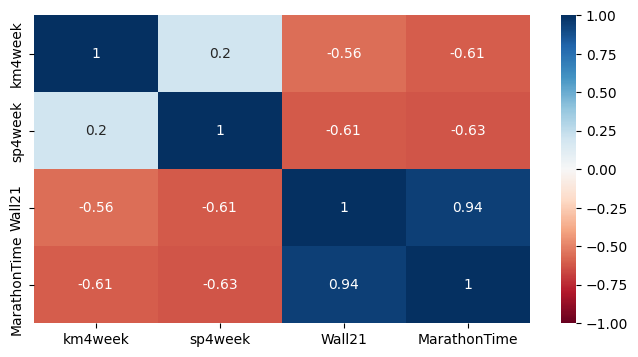

In [44]:
# Matriz de Correlação com Seaborn
plt.figure(figsize = (8,4))
sns.heatmap(MarathonSM.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

A matriz de correlação acima apresenta uma visão mais limpa das correlações entre as variáveis de interesse do estudo. Sendo assim, como nenhuma propriedade foi alterada, as conclusões continuam as mesmas do que já foi exposto anteriormente.

Ainda, para completar a análise exploratória de dados do novo dataset transformado, o código a seguir exibe o gráfico de dispersão (scallet plot) com a biblioteca seaborn. Para melhor identificar as relações, também dividimos o dataset por cores de acordo com classificação de squad.

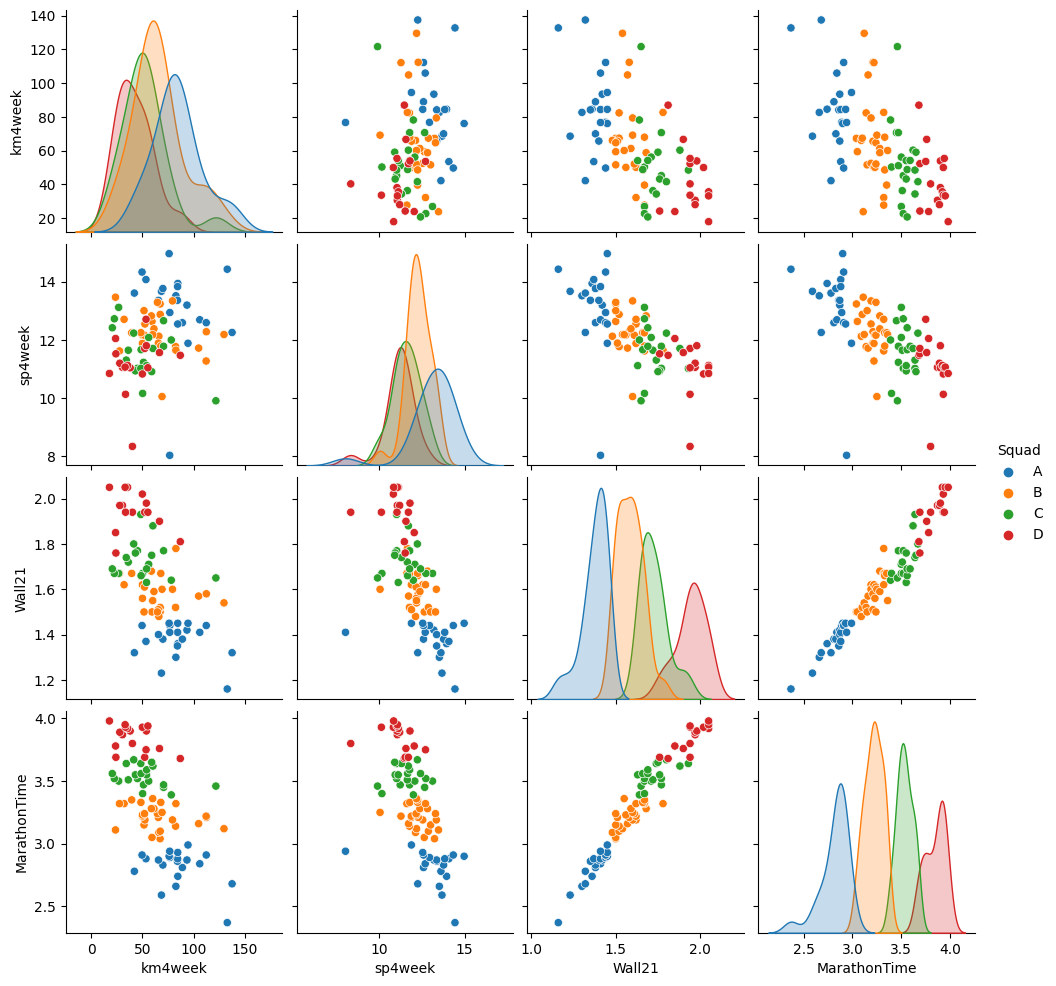

In [45]:
# Scatter Plot com Seaborn - Com divisão por squad

sns.pairplot(MarathonMissings, hue = "Squad", height = 2.5);

A partir do gráfico de dispersão acima, podemos observar com mais clareza a relação entre os atributos km4week e sp4week, com o atributo MarathonTime, indicando que aqueles que tiveram maiores volumes de treinos ou treinos com maior intensidade nas 4 semanas antes da prova, tiveram melhores resultados na maratona. Tornando evidente que os atletas do pelotão A também são aqueles que mais tiveram volume de treinos durante as semanas. Por outro lado, os atletatas do pelotão D tiveram os menores volumes de treino durante as semanas que antencederam a prova.

## 3.3 - Transformação categórica


Para completar as análises de pré-processamento de dados, essa seção irá propor uma transformação categórica do atributo CrossTraning com o objetivo de preparar uma dataframe que irá considerar esse atributo no modelo de Machine Learning.

Para isso, o código abaixo cria um novo dataset que iremos usar nessa transformação.


In [46]:
# Criando novo dataset para tratamento de missings com todas as colunas
col = list(MarathonSM.columns)

# o novo dataset irá conter todas as colunas, exceto a coluna 'Squad'
MarathonCross = dataset[col[:-1]]

# exibindo as primeiras linhas
MarathonCross.head()

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,NaN,1.16,2.37
1,MAM,68.6,13.674419,NaN,1.23,2.59
2,MAM,82.7,13.520436,NaN,1.30,2.66
3,M45,137.5,12.258544,NaN,1.32,2.68
4,MAM,84.6,13.945055,NaN,1.36,2.74


Com esse novo dataset, iremos transformar o atributo CrossTraining em Dummy usando a biblioteca do scikit-learn a partir do processo *dummy encoding*. O código abaixo realiza essa operação.

In [47]:
# definindo o transformador como one hot encoding (com Dummy variable encoder)
encoder = OneHotEncoder(drop= 'first' , sparse=False)

# transformando os dados
dummy = encoder.fit_transform(MarathonCross[['CrossTraining']])
print(dummy)

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0.

# 4. Conclusão

Esse projeto visa construir uma análise exploratória e pré-processamento do dataset MarathonData, que tem o objetivo de construir um modelo de aprendizado de máquina supervisionado para prever o tempo de conclusão de uma maratona com base no histórico de treinos dos atletas 4 semanas antes da prova.

A partir disso, foi possível observar que existe uma forte correlação negativa entre os atributos km4week e sp4week com o atributo MarathonTime, indicando que os atletas que tiveram um maior volume de treino 4 semanas antes, ou seja, correram por uma maior kilometragem ou que tiveram treinos com maior intesidade (registraram uma maior velocidade média durante os treinos nas semanas antes da prova), tiveram melhores resultados na prova. Além disso, é possível observar que os atletas do primeiro pelotão (terminaram a prova abaixo de 3h), são aqueles que também possuem um maior volume de treinos.

Esse projeto, ainda, propõe três novos datasets a serem usados nos modelos de Machine Learning. O primeiro foi criado a partir do processo de limpeza de dados que excluiu os dados faltantes. O segundo propõe uma transformação do atributo CrossTraning em *dummy* com o objetivo de mensurar o impacto de treinos não tradicionais nos resultados da maratona. Já o terceiro exclui do dataset a o atributo Wall21 devido à alta correlação com o atributo MarathonTime.

Por fim, a análise expõe a relação entre os treinos nas últimas semanas e o resultado da maratona e um próximo projeto irá propor um modelo de aprendizado de máquina supervisionado com o objetivo de prever o tempo de conclusão da maratona com base nos históricos de treino de cada atleta.